In [89]:
%matplotlib inline
import math
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
#from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
#import plotly.express as px

import warnings

In [149]:
df_clusters = pd.read_csv('clustered_Healthcare_Providers.csv')
df_clusters.head(4)

,Provider_Credentials,Gender,Entity_Type,City,State,Country_Code,Practice_Type,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Number_of_Services,Number_of_Med_Ben,Unique_Med_Ben_Per_Day_Services,Avg_Med_Allowed_Amnt,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Avg_Med_Stndrdzd_Amnt,Clusters
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24,27,200.58778,305.21112,157.26222,160.908890,0
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175,175,123.73000,548.80000,118.83000,135.315260,0
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13,32,90.65000,155.00000,64.43969,60.595936,0
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18,20,3.50000,5.00000,3.43000,3.430000,0


## **Exploratory Data Analysis**

I'll add a new column for Patient_Responsibility, which is what's left after you subtract Average Medicare Payment Amount from Average Submitted Charge Amount.

In [150]:
#add a new colum for the difference between Avg_Med_Allowed_Amnt and Avg_Submtd_Charge_Amnt
df_clusters['Patient_Responsibility'] = df_clusters['Avg_Submtd_Charge_Amnt'] - df_clusters['Avg_Med_Paymnt_Amnt']
df_clusters.head(4)

,Provider_Credentials,Gender,Entity_Type,City,State,Country_Code,Practice_Type,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Number_of_Services,Number_of_Med_Ben,Unique_Med_Ben_Per_Day_Services,Avg_Med_Allowed_Amnt,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Avg_Med_Stndrdzd_Amnt,Clusters,Patient_Responsibility
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24,27,200.58778,305.21112,157.26222,160.908890,0,147.94890
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175,175,123.73000,548.80000,118.83000,135.315260,0,429.97000
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13,32,90.65000,155.00000,64.43969,60.595936,0,90.56031
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18,20,3.50000,5.00000,3.43000,3.430000,0,1.57000


In [151]:
#define categorical variables df
df_categorical = df_clusters.select_dtypes(['object'])
df_categorical.head(4)

,Provider_Credentials,Gender,Entity_Type,City,State,Country_Code,Practice_Type,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N


In [152]:
#Continuous variables df
df_continuous = df_clusters.select_dtypes(['float32', 'float64', 'int32', 'int64'])
df_continuous.head(4)

,Number_of_Services,Number_of_Med_Ben,Unique_Med_Ben_Per_Day_Services,Avg_Med_Allowed_Amnt,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Avg_Med_Stndrdzd_Amnt,Clusters,Patient_Responsibility
0,27.0,24,27,200.58778,305.21112,157.26222,160.908890,0,147.94890
1,175.0,175,175,123.73000,548.80000,118.83000,135.315260,0,429.97000
2,32.0,13,32,90.65000,155.00000,64.43969,60.595936,0,90.56031
3,20.0,18,20,3.50000,5.00000,3.43000,3.430000,0,1.57000


<Figure size 2160x3600 with 0 Axes>

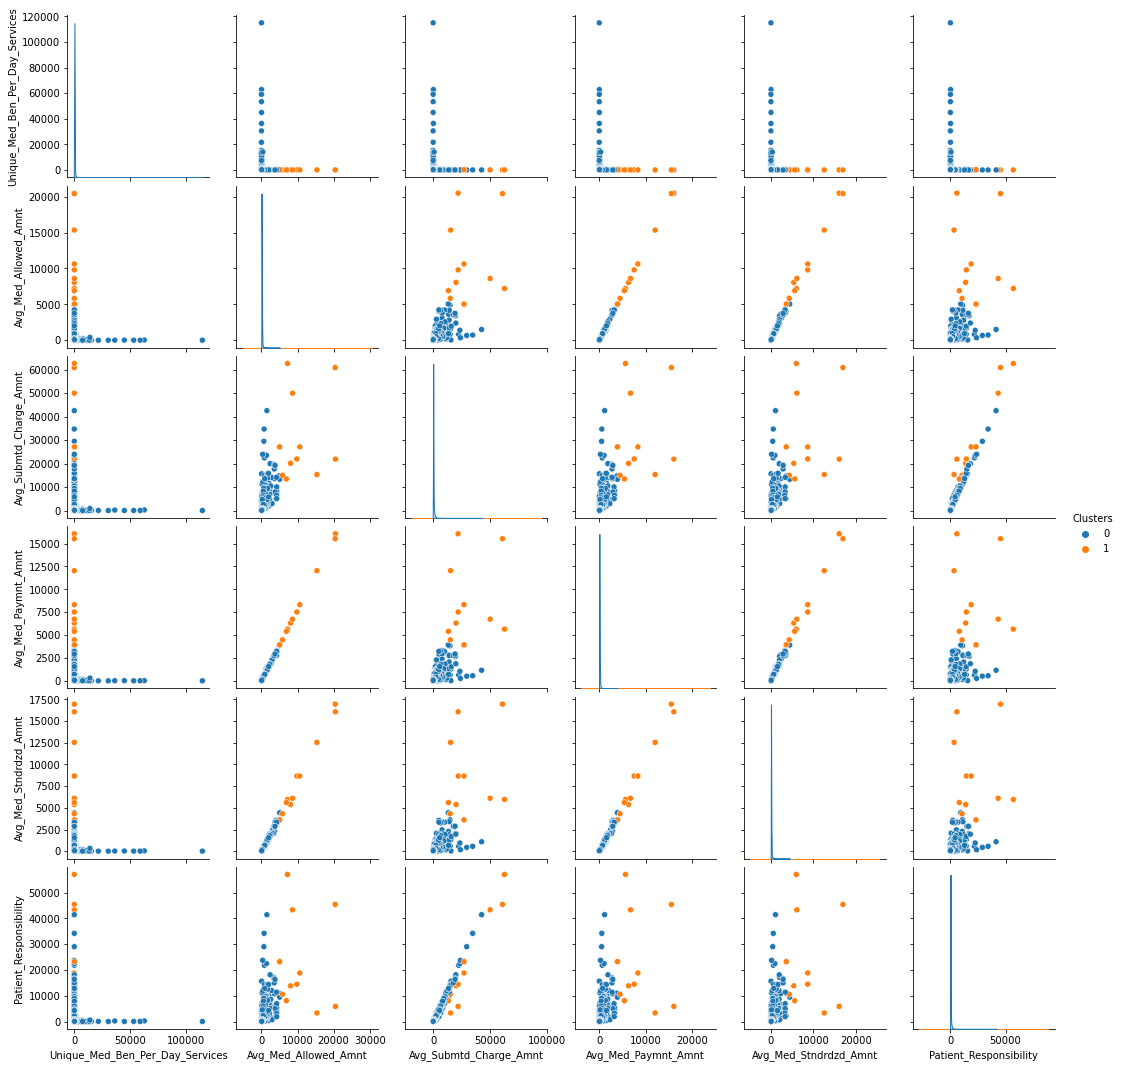

In [148]:
#Pairplot
plt.figure(figsize=(30,50))
#sns.pairplot(df_continuous)
sns.pairplot(df_continuous.drop(df_continuous[['Number_of_Services',
            'Number_of_Med_Ben', ]], axis=1), hue='Clusters')
plt.show()

In [153]:
df_labels = df_clusters.groupby('Clusters').sum()[['Avg_Med_Allowed_Amnt', 'Avg_Submtd_Charge_Amnt', 
            'Avg_Med_Paymnt_Amnt', 'Avg_Med_Stndrdzd_Amnt', 'Patient_Responsibility']].reset_index()
df_labels

,Clusters,Avg_Med_Allowed_Amnt,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Avg_Med_Stndrdzd_Amnt,Patient_Responsibility
0,0,2.395151e+06,8.039587e+06,1.804504e+06,1.820319e+06,6.235083e+06
1,1,1.005856e+05,2.802717e+05,7.820492e+04,8.036209e+04,2.020668e+05
2,2,6.438350e+02,7.267200e+02,4.685626e+02,4.939654e+02,2.581575e+02
3,3,1.186465e+02,6.650018e+02,1.148050e+02,1.235839e+02,5.501968e+02
4,4,4.792994e+05,2.167751e+06,3.709881e+05,3.729192e+05,1.796762e+06
5,5,9.748520e+04,1.544051e+05,8.883477e+04,8.937927e+04,6.557035e+04


<function matplotlib.pyplot.show(close=None, block=None)>

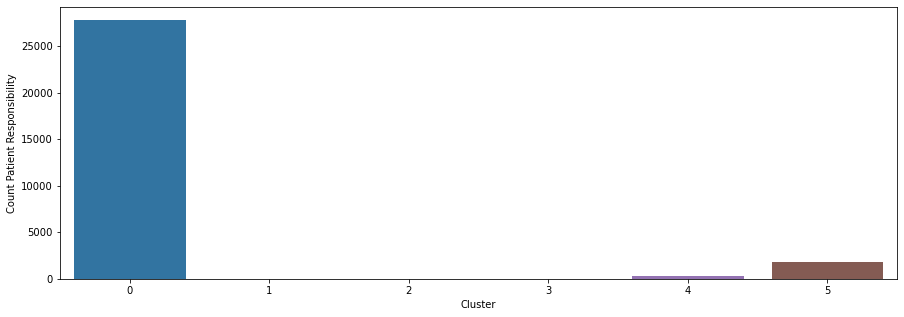

In [123]:
#count plot of each cluster
plt.figure(figsize=(15,5))
sns.barplot(x=df_clusters.groupby('Clusters')['Patient_Responsibility'].count().index, y=df_clusters.groupby('Clusters')['Patient_Responsibility'].count())
plt.xlabel('Cluster')
plt.ylabel('Count Patient Responsibility')
plt.show

In [109]:
#cluster count
df_clusters['Clusters'].value_counts()

0    27800
5     1822
4      353
2        9
1        8
3        7
Name: Clusters, dtype: int64

According to the KMeans 6 cluster results, 27,800 of the Providers belong to the 0 Cluster, 8 of the Providers belong to the 1 Cluster, 9 of the Providers belong to the 2 Cluster, 7 of the Providers belong to the 3 Cluster, 353 of the Providers belong to the 4 Cluster and 1,822 of the Providers belong to the 5 Cluster.

0     27800
1        8
2        9
3        7
4      353
5     1822



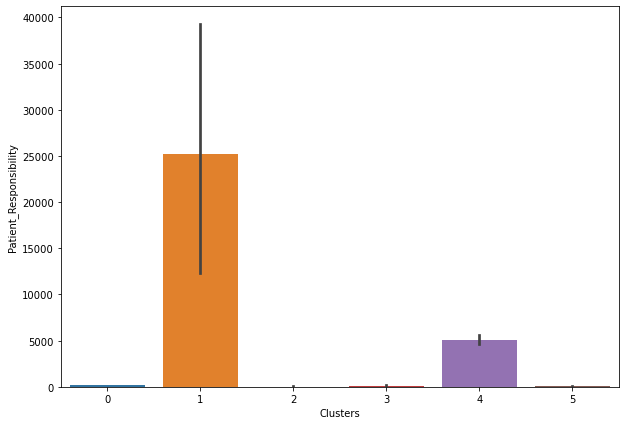

In [140]:
plt.figure(figsize = (10, 7))
sns.barplot(x='Clusters', y = 'Patient_Responsibility', data = df_clusters)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

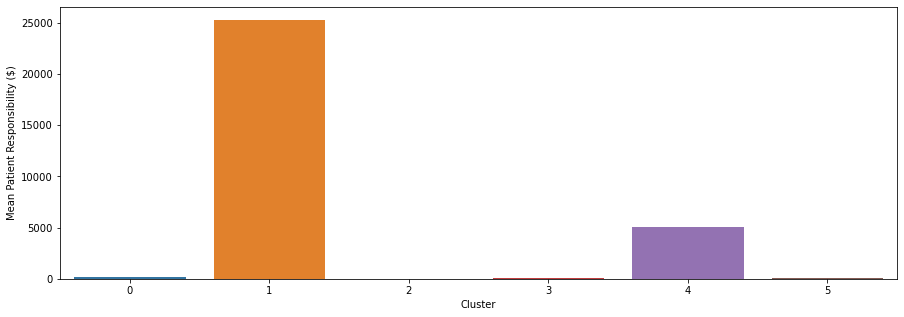

In [146]:
#plot of mean patient responsibility
mean_patient_resp = df_clusters.groupby('Clusters')['Patient_Responsibility'].mean()

plt.figure(figsize=(15,5))
sns.barplot(x=mean_patient_resp.index, y=mean_patient_resp)
plt.xlabel('Cluster')
plt.ylabel('Mean Patient Responsibility ($)')
plt.show

In [147]:
#show the average patient responsibilty for each cluster
mean_patient_resp.values

array([  224.28356977, 25258.35245   ,    28.68416256,    78.5995422 ,
        5089.97849705,    35.98811545])

On average providers in Cluster 1 leave patients with highest responsibility, 25,258.35. Cluster 3 comes in second place at 5,089.98.

In [115]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider_Credentials             29999 non-null  int64  
 1   Gender                           29999 non-null  int64  
 2   Entity_Type                      29999 non-null  int64  
 3   City                             29999 non-null  int64  
 4   State                            29999 non-null  int64  
 5   Country_Code                     29999 non-null  int64  
 6   Practice_Type                    29999 non-null  int64  
 7   Med_Participatn_Indicator        29999 non-null  int64  
 8   Place_of_Service                 29999 non-null  int64  
 9   HCPCS_Code                       29999 non-null  int64  
 10  HCPCS_Drug_Indicator             29999 non-null  int64  
 11  Number_of_Services               29999 non-null  float64
 12  Number_of_Med_Ben 

In [159]:
clusters_0 = (df_clusters['Clusters'] == 0)
clusters_0_df = df_clusters.iloc[clusters_0.values, [0,8,9,10,15,16,19]]
clusters_0_df

,Provider_Credentials,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Patient_Responsibility
0,M.D.,F,99223,N,305.211120,157.262220,147.948900
1,M.D.,O,G0202,N,548.800000,118.830000,429.970000
2,DPM,O,99348,N,155.000000,64.439690,90.560310
3,MD,O,81002,N,5.000000,3.430000,1.570000
4,DO,O,96372,N,40.000000,19.539394,20.460606
...,...,...,...,...,...,...,...
29993,MD,O,76856,N,359.230770,30.887949,328.342821
29994,MD,O,83540,N,31.000000,8.416250,22.583750
29995,NaN,O,G0009,N,20.793438,18.365625,2.427813
29996,MD,O,17111,N,135.078120,88.228130,46.849990


In [158]:
clusters_1 = (df_clusters['Clusters'] == 1)
clusters_1_df = df_clusters.iloc[clusters_1.values, [0,4,7,8,9,10,15,16,19]]
clusters_1_df
#clusters_123[['Provider_Credentials','Unique_Med_Ben_Per_Day_Services','Patient_Responsibility']]


,Provider_Credentials,State,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Patient_Responsibility
1122,M.D,NY,Y,O,36906,N,20150.250,6317.3650,13832.8850
2247,NaN,KS,Y,F,C1822,N,21941.000,16067.3000,5873.7000
7321,NaN,FL,Y,F,63685,N,60940.840,15529.5320,45411.3080
8091,NaN,TX,Y,F,33228,N,62694.000,5655.2246,57038.7754
8526,NaN,KY,Y,F,64590,N,15354.000,12037.5400,3316.4600
11548,M.D.,NC,Y,O,37225,N,22000.000,7524.9478,14475.0522
13686,MD,FL,Y,O,37225,N,27146.654,8327.6150,18819.0390
15338,NaN,NV,Y,F,33208,N,50045.000,6745.4000,43299.6000


In [157]:
clusters_2 = (df_clusters['Clusters'] == 2)
clusters_2_df = df_clusters.iloc[clusters_2.values, [0,4,7,8,9,10,15,16,19]]
clusters_2_df

,Provider_Credentials,State,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Patient_Responsibility
1983,MD,IL,N,O,99354,N,152.350000,98.730000,53.620000
3070,DO,MT,N,O,99211,N,21.400000,11.223077,10.176923
4833,MD,VA,N,O,17261,N,159.750000,122.981670,36.768330
7291,M.D.,NC,N,O,90838,N,122.320000,70.695960,51.624040
16870,"B.S., D.C.",TX,N,O,98941,N,36.600000,26.336842,10.263158
19443,M.D.,IL,N,O,11100,N,109.540140,59.592700,49.947440
21448,D.C.,TX,N,O,98941,N,41.800000,25.168058,16.631942
24103,DC,TX,N,O,98941,N,39.959892,25.016336,14.943556
26543,D.C.,CA,N,O,98941,N,43.000000,28.817926,14.182074


In [156]:
clusters_3 = (df_clusters['Clusters'] == 3)
clusters_3_df = df_clusters.iloc[clusters_3.values, [0,4,7,8,9,10,15,16,19]]
clusters_3_df

,Provider_Credentials,State,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Patient_Responsibility
609,NaN,ID,Y,O,G0008,N,25.735085,24.545683,1.189402
2491,NaN,VA,Y,F,A0425,N,17.616510,5.726819,11.889691
5690,NaN,AZ,Y,O,82306,N,266.127780,31.462503,234.665277
12651,NaN,NC,Y,O,87088,N,28.535680,10.814133,17.721547
13714,NaN,NC,Y,O,83883,N,227.927550,18.257477,209.670073
18376,NaN,FL,Y,O,80053,N,57.480000,12.381826,45.098174
26834,NaN,TX,Y,O,87186,N,41.579240,11.616609,29.962631


In [155]:
clusters_4 = (df_clusters['Clusters'] == 4)
clusters_4_df = df_clusters.iloc[clusters_4.values, [0,4,7,8,9,10,15,16,19]]
clusters_4_df

,Provider_Credentials,State,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Patient_Responsibility
72,MD,WA,Y,O,95811,N,5421.0000,517.96930,4903.03070
122,MD,NJ,Y,F,27130,N,8700.0000,1522.47800,7177.52200
175,M.D.,NJ,Y,F,57425,N,2144.0000,727.91473,1416.08527
221,M.D.,MO,Y,F,22551,N,6785.6600,1230.85080,5554.80920
340,NaN,NE,Y,F,49505,N,6343.3486,1004.35690,5338.99170
...,...,...,...,...,...,...,...,...,...
29750,MD,NV,Y,F,63030,N,34752.8550,559.46716,34193.38784
29836,NaN,IL,Y,F,25609,N,19253.4000,2938.12720,16315.27280
29879,M.D.,FL,Y,F,52601,N,2422.3074,711.40936,1710.89804
29928,MD,WA,Y,O,77301,N,5839.0000,1568.63350,4270.36650


In [154]:
clusters_5 = (df_clusters['Clusters'] == 5)
clusters_5_df = df_clusters.iloc[clusters_5.values, [0,4,7,8,9,10,15,16,19]]
clusters_5_df

,Provider_Credentials,State,Med_Participatn_Indicator,Place_of_Service,HCPCS_Code,HCPCS_Drug_Indicator,Avg_Submtd_Charge_Amnt,Avg_Med_Paymnt_Amnt,Patient_Responsibility
26,M.D.,FL,Y,O,90670,Y,318.000000,183.587920,134.412080
40,NaN,GA,Y,O,90686,Y,19.040000,18.650000,0.390000
49,MD,TX,Y,O,J1100,Y,25.000000,0.078250,24.921750
76,NaN,NH,Y,O,90662,Y,145.850000,47.976430,97.873570
78,PA,GA,Y,O,J1030,Y,18.000000,4.321582,13.678418
...,...,...,...,...,...,...,...,...,...
29919,MD,NC,Y,O,J7030,Y,25.990000,1.477568,24.512432
29972,PA-C,NC,Y,O,J1040,Y,10.475316,7.210717,3.264599
29979,M. D.,CA,Y,O,A9575,Y,0.440000,0.161818,0.278182
29984,M.D.,OH,Y,O,90686,Y,35.000000,18.650000,16.350000
